### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

In [27]:
from numpy import linalg as LA
import numpy as np
input = np.loadtxt("matrix_data.txt", delimiter=' ')
v=np.ones(len(input))
for i in range (1000):
    a=LA.matrix_power(input,i)
    b=LA.norm(np.matmul(a,v))
    
    if i==0:
        print(b**(1/0.000000001))
    else:
        print(b**(1/i))
print("r(X)=: ",LA.eigvals(input).max())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


inf
2.8955596094997884
1.6533705884959464
1.3827677582734503
1.270246847512816
1.2102469135753608
1.1735158103846244
1.148891153707294
1.1312640835714298
1.1180009089837755
1.1076231494354505
1.0992450669042386
1.0923077577250317
1.08644312784366
1.0813998244667853
1.0770007895461924
1.0731178695459664
1.0696560609406822
1.066543418864697
1.0637244102666943
1.0611554261534324
1.0588016837952903
1.056635045339793
1.0546324537150875
1.0527747924887199
1.051046042089295
1.0494326465740036
1.0479230322135924
1.046507237059809
1.0451766226826327
1.043923647469789
1.0427416865628205
1.0416248874916716
1.0405680534036845
1.0395665478205507
1.0386162163379555
1.037713321770442
1.0368544900506134
1.0360366647953527
1.0352570689072613
1.0345131719261138
1.0338026621108984
1.0331234224383141
1.0324735098632862
1.0318511373121295
1.0312546579775703
1.030682551563004
1.0301334121857446
1.0296059376990596
1.0290989202331655
1.0286112377881083
1.0281418467381598
1.0276897751292398
1.0272541166688995


1.0058360393123373
1.0058343891302672
1.00583274281097
1.0058311003408982
1.0058294617065682
1.0058278268945589
1.0058261958915116
1.0058245686841303
1.0058229452591805
1.005821325603489
1.0058197097039439
1.005818097547494
1.0058164891211485
1.0058148844119765
1.0058132834071074
1.0058116860937292
1.005810092459089
1.005808502490493
1.0058069161753058
1.0058053335009494
1.0058037544549037
1.005802179024706
1.005800607197951
1.0057990389622897
1.0057974743054292
1.005795913215133
1.0057943556792204
1.0057928016855657
1.005791251222099
1.0057897042768043
1.0057881608377206
1.005786620892941
1.0057850844306124
1.0057835514389353
1.0057820219061633
1.0057804958206031
1.005778973170614
1.0057774539446076
1.0057759381310476
1.0057744257184498
1.0057729166953806
1.0057714110504585
1.0057699087723524
1.005768409849782
1.0057669142715175
1.0057654220263788
1.0057639331032355
1.0057624474910074
1.0057609651786625
1.0057594861552188
1.0057580104097423
1.0057565379313476
1.0057550687091972
1.0057

### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



In [55]:
from numba import jit
from matplotlib import pyplot as plt
@jit
def f(): 
    a=4
    n = 200
    SMALL_SIZE = 4
    MEDIUM_SIZE = 5
    BIGGER_SIZE = 6
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)
    #fig,axes=plt.subplot(100,sharey=True)
    for i in range (100):
        x =  np.empty(n)
        x[0] = np.random.uniform(0,1,1)
        for t in range(n-1):
            x[t+1] = a * x[t] * (1 - x[t])
        plt.subplot(10,10,i+1)
        plt.hist(x)

        

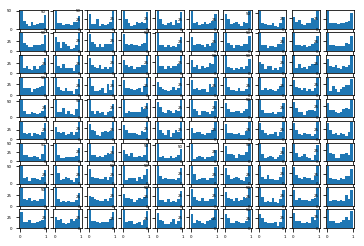

In [56]:
f()